In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import polars as pl
import pytomlpp as toml
import pandas as pd
from data_preprocessing import getXY, data_normalizeation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from tqdm import tqdm
import numpy as np
import pandas as pd
import polars as pl
import pytomlpp as toml
from data_preprocessing import getXY, data_normalizeation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_recall_curve, average_precision_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
cfg = toml.load('/home/gyli/GP_HP/cfg/feature_selection.toml')
data_path = cfg['data_path']
variance_filter_thres = cfg['variance_filter_thres']
raw_x, raw_y = getXY(data_path)
# raw_x = data_normalizeation(raw_x)
future_names = raw_x.columns
X, y = raw_x.select(['年龄', '淋巴细胞数', '白蛋白', '活化部分凝血活酶时间', '低密度脂蛋白', '钠', '中性粒细胞数', '甘油三酯', '凝血酶原时间', '红细胞平均体积', '总胆红素']).to_pandas(), np.ravel(raw_y.to_pandas())

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
pl.read_csv('/home/gyli/GP_HP/result/rf_results_back.csv').sort(by='mean_score', descending=True)[0]

,n_estimators,max_depth,min_samples_leaf,min_samples_split,max_features,mean_score,std,cross_val_score_1,cross_val_score_2,cross_val_score_3,cross_val_score_4,cross_val_score_5
i64,i64,i64,i64,i64,str,f64,f64,f64,f64,f64,f64,f64
0,190,10,2,2,"""sqrt""",0.754115,0.127033,0.790501,0.576087,0.897947,0.869163,0.636876


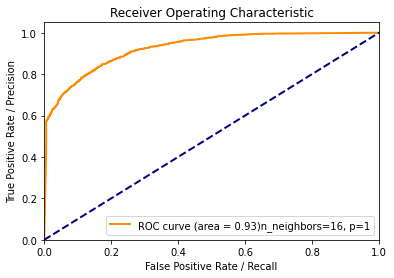

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=16, p=1, weights='distance')
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 归一化处理
    ('model', knn_model)  # 在这里更改模型
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipeline.fit(X_train, y_train)
y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算准确率和召回率
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# print("Precision:", accuracy)
# print("Recall:", recall)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + 'n_neighbors=16, p=1')
# plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Precision: 0.8442238024956393
Recall: 0.9073435189748644


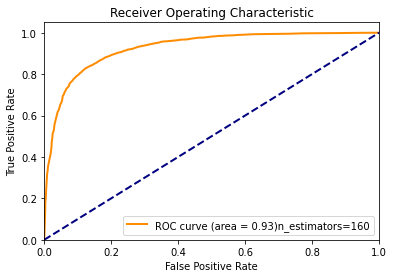

<bound method BaseForest.decision_path of RandomForestClassifier(n_estimators=160)>


In [7]:

rf_model = RandomForestClassifier(n_estimators=160)

rf_model.fit(X_train, y_train)
y_score = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算准确率和召回率
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", accuracy)
print("Recall:", recall)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + 'n_estimators=160')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(rf_model.decision_path)

In [9]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 160,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Precision: 0.7635851335032873
Recall: 0.8496796451453918


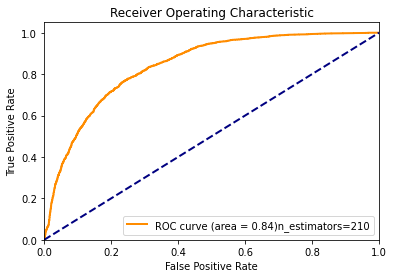

In [8]:
gbdt_model = GradientBoostingClassifier(n_estimators=210)
gbdt_model.fit(X_train, y_train)
y_score = gbdt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算准确率和召回率
y_pred = gbdt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", accuracy)
print("Recall:", recall)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + 'n_estimators=210')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Precision: 0.751509459278143
Recall: 0.5443568260226712


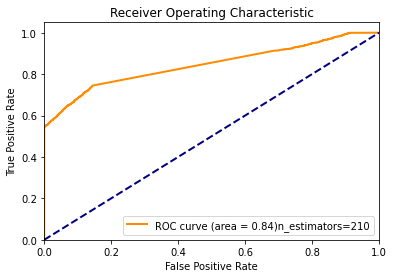

In [25]:
svm = SVC(gamma=5, C=8, probability=True)
svm.fit(X_train, y_train)
y_score = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算准确率和召回率
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", accuracy)
print("Recall:", recall)

# 绘制 ROC 曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc + 'n_estimators=210')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
knn_predictions = pipeline.predict(X_test)
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gbdt_predictions = gbdt_model.predict(X_test)

# 计算准确率
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
gbdt_accuracy = accuracy_score(y_test, gbdt_predictions)

# 计算精确率
knn_precision = precision_score(y_test, knn_predictions)
svm_precision = precision_score(y_test, svm_predictions)
rf_precision = precision_score(y_test, rf_predictions)
gbdt_precision = precision_score(y_test, gbdt_predictions)

# 计算召回率
knn_recall = recall_score(y_test, knn_predictions)
svm_recall = recall_score(y_test, svm_predictions)
rf_recall = recall_score(y_test, rf_predictions)
gbdt_recall = recall_score(y_test, gbdt_predictions)

# 计算 F1 分数
knn_f1_score = f1_score(y_test, knn_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
gbdt_f1_score = f1_score(y_test, gbdt_predictions)

In [15]:
print('knn', knn_accuracy)
print('knn', rf_accuracy)
print('knn', gbdt_accuracy)

knn 0.8171206225680934
knn 0.8442238024956393
knn 0.7635851335032873


In [17]:
print('精确率', knn_precision)
print('精确率', rf_precision)
print('精确率', gbdt_precision)

精确率 0.7764102564102564
精确率 0.8242668457577793
精确率 0.7495652173913043


In [18]:
print('召回率', knn_recall)
print('召回率', rf_recall)
print('召回率', gbdt_recall)

召回率 0.9327254805322819
召回率 0.9073435189748644
召回率 0.8496796451453918


In [19]:
print('f1-score', knn_f1_score)
print('f1-score', rf_f1_score)
print('f1-score', gbdt_f1_score)

f1-score 0.8474196798388
f1-score 0.8638123167155425
f1-score 0.7964887964887964


In [26]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=16, p=1, weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=16, p=1, weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 16,
 'model__p': 1,
 'model__weights': 'distance'}